In [2]:
import numpy as np
import pandas as pd

In [3]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [5]:
train_data.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [7]:
test_data.head()

textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative
3  01082688c6                                        happy bday!  positive
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive

In [8]:
print(train_data.notnull().sum())
print('-'*30)
print(train_data.isnull().sum())

textID           27481
text             27480
selected_text    27480
sentiment        27481
dtype: int64
------------------------------
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


Có một hàng trong tập huấn luyện mà có **text** và **selected_text** bị missing. Loại bỏ nó.

In [9]:
train_data.dropna(axis=0, inplace=True)

In [10]:
train_data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

<AxesSubplot:title={'center':'Phân phối sentiment trong tập train'}>

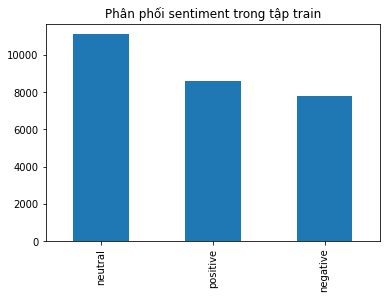

In [13]:
train_data['sentiment'].value_counts().plot(kind='bar', title='Phân phối sentiment trong tập train')

<AxesSubplot:title={'center':'Phân phối sentiment tập test'}>

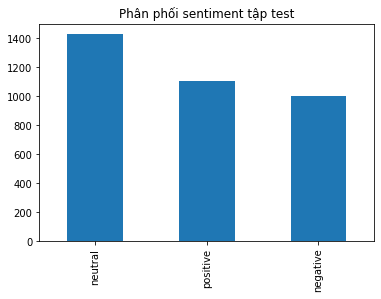

In [14]:
test_data['sentiment'].value_counts().plot(kind='bar', title='Phân phối sentiment tập test')

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/thang/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/thang/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/thang/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

def clean_data(text):
  # Loại bỏ dấu chấm câu
  text = "".join([c for c in text if c not in string.punctuation])
  # Token
  text = word_tokenize(text)
  # Remove stopword
  text = [w for w in text if (w not in stopwords.words('english'))]
  # Lemazation
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(w, pos="a") for w in text]
  # Steming
  stemmer = PorterStemmer()
  text = " ".join([stemmer.stem(w) for w in text])
  return text

train_data['selected_text_cleaned'] = train_data['selected_text'].apply(lambda text: clean_data(text))
train_data['text_cleaned'] = train_data['text'].apply(lambda text: clean_data(text))
train_data.head(10)

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   
5  28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
6  6e0c6d75b1  2am feedings for the baby are fun when he is a...   
7  50e14c0bb8                                         Soooo high   
8  e050245fbd                                        Both of you   
9  fc2cbefa9d   Journey!? Wow... u just became cooler.  hehe....   

                                       selected_text sentiment  \
0                I`d have responded, if I were going   neutral   
1                                           Sooo SAD  negative   
2                                        bullying me  negative   
3                                     leave me alone  negative   
4                                      Sons of ****,  negative   
5  http://www.dothebouncy.com/smf - some shameles...   neutral   
6                                                fun  positive   
7                                         Soooo high   neutral   
8                                        Both of you   neutral   
9                       Wow... u just became cooler.  positive   

                               selected_text_cleaned  \
0                                    Id respond I go   
1                                           sooo sad   
2                                              bulli   
3                                          leav alon   
4                                                son   
5  httpwwwdothebouncycomsmf shameless plug best r...   
6                                                fun   
7                                         soooo high   
8                                               both   
9                                   wow u becam cool   

                                        text_cleaned  
0                                    Id respond I go  
1                          sooo sad I miss san diego  
2                                         boss bulli  
3                                interview leav alon  
4              son couldnt put releas alreadi bought  
5  httpwwwdothebouncycomsmf shameless plug best r...  
6                        2am feed babi fun smile coo  
7                                         soooo high  
8                                               both  
9              journey wow u becam cool hehe possibl

In [20]:
!pip install wordcloud

     |████████████████████████████████| 372 kB 289 kB/s 


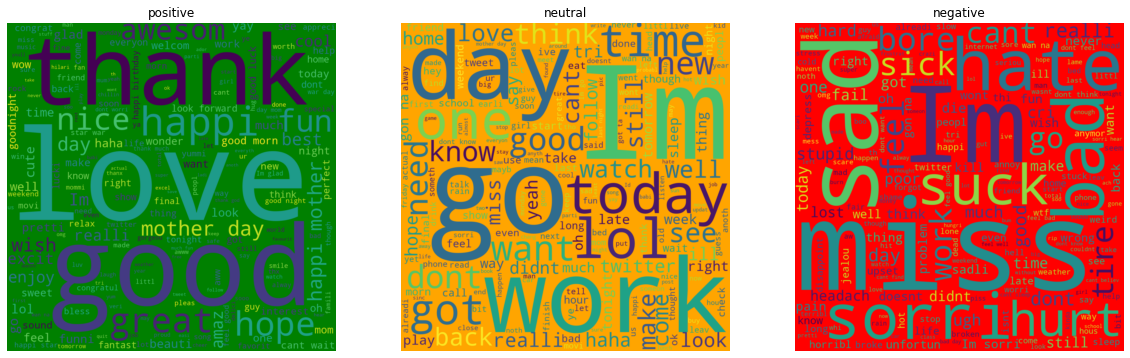

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stop_w = set(STOPWORDS)

sentiment=['positive','neutral','negative']
fig, a = plt.subplots(1,3, figsize=(20,20))
for i,s in enumerate(sentiment):   
    total_token = ''
    total_token +=' '.join(train_data.loc[train_data['sentiment']==s,'selected_text_cleaned'])
    if (s == 'positive'):
        w_cloud = WordCloud(width=1200, height=1200, background_color='green', stopwords = stop_w, min_font_size=12).generate(total_token)
    if (s == 'neutral'):
        w_cloud = WordCloud(width=1200, height=1200, background_color='orange', stopwords = stop_w, min_font_size=12).generate(total_token)
    if (s == 'negative'):
        w_cloud = WordCloud(width=1200, height=1200, background_color='red', stopwords = stop_w, min_font_size=12).generate(total_token)
    a[i].imshow(w_cloud, interpolation = 'bilinear')  
    a[i].set_title(s)
    a[i].axis('off')

In [23]:
!pip install seaborn

     |████████████████████████████████| 283 kB 489 kB/s 


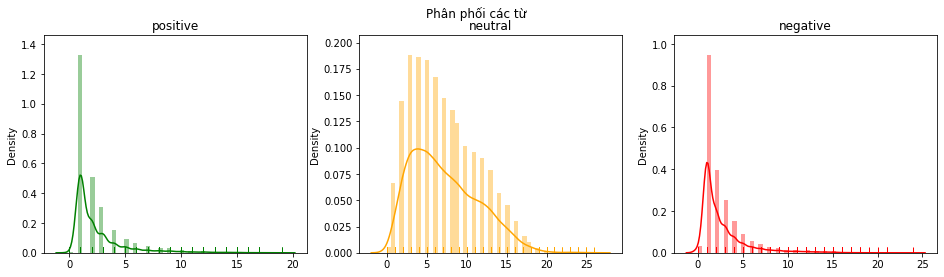

In [32]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color = ['green', 'orange', 'red']
def unique_words_analysis(train_data):
  fig, ax = plt.subplots(1, 3, figsize=(16,4))
  for i, s in enumerate(sentiment):
    new = train_data[train_data['sentiment']==s]['selected_text_cleaned'].map(lambda x: len(set(x.split())))
    sns.distplot(new.values, ax=ax[i], color=color[i], rug=True)
    ax[i].set_title(s)
  fig.suptitle("Phân phối các từ")
  fig.show()

unique_words_analysis(train_data)

In [33]:
!pip install tokenizers

     |████████████████████████████████| 3.0 MB 106 kB/s 


In [35]:
# BPE (Byte Pair Encoding) tokenizer is used for tokenizing text

import tokenizers
import numpy as np
max_len = 128
tokenizer = tokenizers.ByteLevelBPETokenizer(
    vocab_file = './roberta.base.tf/vocab-roberta-base.json',
    merges_file = './roberta.base.tf/merges-roberta-base.txt',
    lowercase=True,
    add_prefix_space=True
)

sentiment_id = {'positive': tokenizer.encode('positive').ids[0],
                'negative':tokenizer.encode('negative').ids[0], 
                'neutral':tokenizer.encode('neutral').ids[0]}

train_data.reset_index(inplace=True)

In [36]:
tokenizer.decode([2])

'</s>'

In [37]:
sentiment_id

{'positive': 1313, 'negative': 2430, 'neutral': 7974}

In [38]:
train_data.shape

(27480, 7)

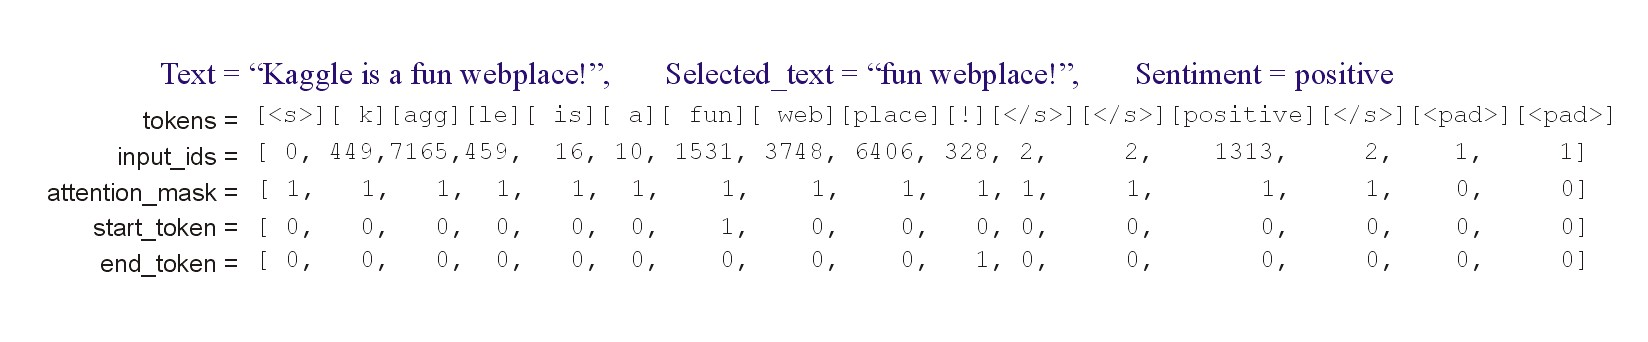

In [39]:
# Định dạng input data cho training

num_samples = train_data.shape[0]

# Các token đầu vào (sub word) dưới dạng số
input_ids = np.ones((num_samples, max_len), dtype='int32')
# 1 là attention, 0 thì không là attention (ví dụ pad)
attention_mask = np.zeros((num_samples, max_len), dtype='int32')

token_type_ids = np.zeros((num_samples, max_len), dtype='int32')

# 1 là vị trí bắt đầu của token selected_text, còn lại là 0
start_tokens = np.zeros((num_samples, max_len), dtype='int32')
# 1 là vị trí kết thúc của token selected_text, còn lại là 0
end_tokens = np.zeros((num_samples, max_len), dtype='int32')

In [40]:
train_data.columns

Index(['index', 'textID', 'text', 'selected_text', 'sentiment',
       'selected_text_cleaned', 'text_cleaned'],
      dtype='object')

In [41]:
for k in range(num_samples):
  # FIND OVERLAP
  text1 = " "+" ".join(train_data.loc[k,'text'].split())
  text2 = " ".join(train_data.loc[k,'selected_text'].split())
  idx = text1.find(text2)
  chars = np.zeros(len(text1))
  # đánh dấu những ký tự mà bao gồm text2
  chars[idx:idx+len(text2)] = 1
  if text1[idx-1] == ' ':
    chars[idx-1] = 1
  enc = tokenizer.encode(text1)
  # print(enc.ids)

  # ID_OFFSETS
  offsets = []
  idx =0
  for num in enc.ids:
    w = tokenizer.decode([num])
    offsets.append((idx, idx+len(w)))
    idx+=len(w)
  
  # START END TOKENS
  tokens = []
  for i, (a, b) in enumerate(offsets):
    sum = np.sum(chars[a:b])
    if sum>0:
      tokens.append(i)
  
  s_token = sentiment_id[train_data.loc[k,'sentiment']]
  # Cấu hình các định dạng đầu vào
  input_ids[k, :len(enc.ids)+5] = [0] + enc.ids + [2,2] + [s_token] + [2]
  attention_mask[k, :len(enc.ids)+5]=1
  if len(tokens)>0:
    start_tokens[k, tokens[0]+1]=1
    end_tokens[k, tokens[-1]+1]=1

# Build model
Chúng ta sử dụng pretrained roBERTa base model và thêm một custom question answer head. Các token đầu là input vào bert_model và chúng ta sử dụng ouput đầu tiên của BERT. Các nhúng của tất cả các token đầu vào và có số chiều là (batch_size, max_len, 768). Tiếp theo chúng ta áp dụng Conv1D(filters=1, kernel_size=1) và chuyển đổi các embedding thànnh số chiều (batch_size, max_len, 1). Chúng ta flaten và áp dụng softmax, vì vậy kết quả cuối cùng x1 có chiều là (batch_size, max_len). Đây là one hot encoding của start token (cho selected_text) và x2 là end_tokens

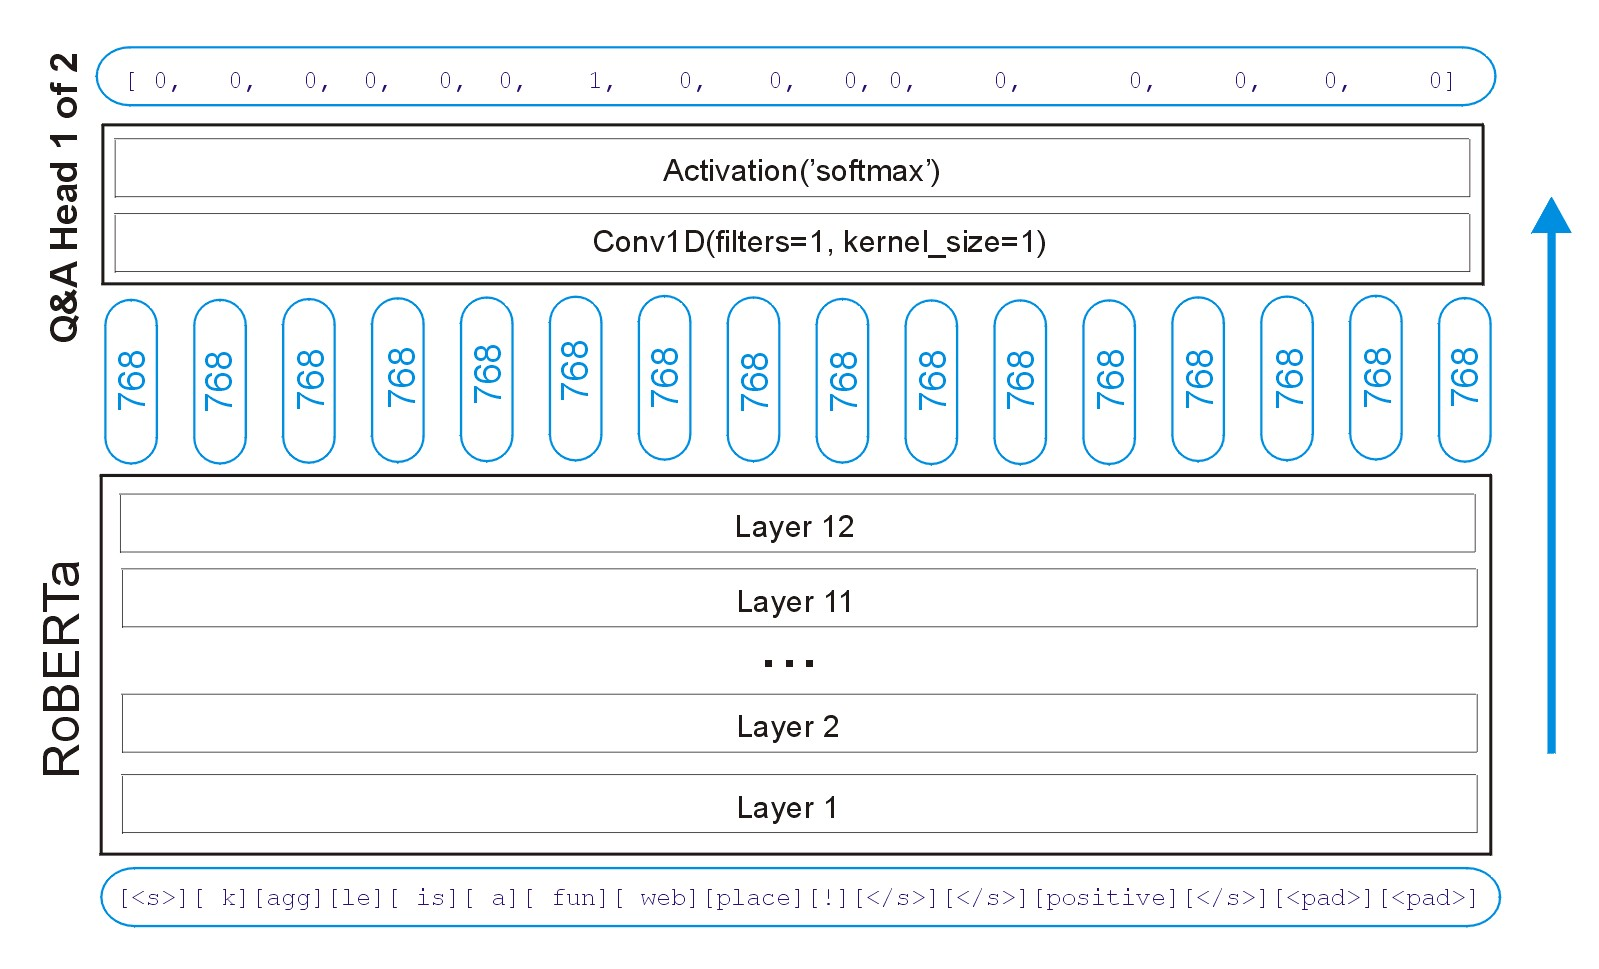


In [44]:
!pip install transformers

     |████████████████████████████████| 884 kB 511 kB/s 
     |████████████████████████████████| 3.0 MB 125 kB/s 
     |████████████████████████████████| 883 kB 49 kB/s 
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
     |████████████████████████████████| 1.1 MB 292 kB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893260 sha256=c9cc08848b2981ebb962d86bdc8703c2d743d0372ca1333f007cca60aa42feb5
  Stored in directory: /home/thang/.cache/pip/wheels/7b/78/f4/27d43a65043e1b75dbddaa421b573eddc67e712be4b1c80677
Successfully built sacremoses
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.8.1
    Uninstalling tokenizers-0.8.1:
      Successfully uninstalled tokenizers-0.8.1


In [45]:
import tensorflow as tf
from transformers import RobertaConfig, TFRobertaModel

In [47]:
!ls

data   roberta.base.tf  'Tweet Sentiment Extraction using RoBERTa .ipynb'


In [48]:
ls roberta.base.tf/

config-roberta-base.json*  pretrained-roberta-base.h5*
merges-roberta-base.txt*   vocab-roberta-base.json*


In [49]:
def build_model():
    ids = tf.keras.layers.Input((max_len,), dtype=tf.int32)
    att = tf.keras.layers.Input((max_len,), dtype=tf.int32)
    tok = tf.keras.layers.Input((max_len,), dtype=tf.int32)

    config = RobertaConfig.from_pretrained('./data/config-roberta-base.json')
    bert_model = TFRobertaModel.from_pretrained('./data/pretrained-roberta-base.h5')

    x = bert_model(ids, attention_mask = att, token_type_ids=tok)

    x1 = tf.keras.layers.Dropout(0.1)(x[0])
    x1 = tf.keras.layers.Conv1D(1, 1)(x1)
    x1 = tf.keras.layers.Flatten()(x1)
    x1 = tf.keras.layers.Activation('softmax')(x1)

    x2 = tf.keras.layers.Dropout(0.1)(x[0])
    x2 = tf.keras.layers.Conv1D(1, 1)(x2)
    x2 = tf.keras.layers.Flatten()(x2)
    x2 = tf.keras.layers.Activation('softmax')(x2)

    model = tf.keras.models.Model(inputs=[ids, att, tok], outputs=[x1,x2])
    optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)

    return model

In [50]:
# Metric
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

# Train Roberta model